# ***Проект: Исследовательский анализ данных***  

## Исследование объявлений о продаже квартир

В распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Определим рыночную стоимость объектов недвижимости. Для этого проведем исследовательский анализ данных и установим параметры, влияющие на цену объектов. 

# **Шаг 1. Знакомство с данными**

In [1]:
from io import BytesIO
import requests
spreadsheet_id = '12q3_0Gi6Q6jAY78Cxh9qZQKqeknaJdz9ElDW7Io9OjY'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import math

In [3]:
data = pd.read_csv(BytesIO(r.content), sep=',', decimal='.')

In [4]:
display(data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07 0:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04 0:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20 0:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24 0:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19 0:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10 0:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02 0:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18 0:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23 0:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26 0:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [5]:
len(data)

23699

Обрабатываемый сет содержит 23699 позиций - объявлений о продаже квартир и иной жилой недвижимости.

### ***Ознакомимся с общей информацией о данных:***

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Некоторые данные (например, цена или площадь) сохранены в  формате *object*. Для дальнейшего анализа и работы с этими данными их нужно перевести в числовые форматы. 

In [7]:
data['last_price'] = data['last_price'].astype('float')
data['total_area'] = data['total_area'].astype('float')
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d %H:%M:%S')
data['ceiling_height'] = data['ceiling_height'].astype('float')
data['floors_total'] = data['floors_total'].astype('float')
data['living_area'] = data['living_area'].astype('float')
data['is_apartment'] = data['is_apartment'].astype('bool')
data['kitchen_area'] = data['kitchen_area'].astype('float')
data['airports_nearest'] = data['airports_nearest'].astype('float')
data['cityCenters_nearest'] = data['cityCenters_nearest'].astype('float')
data['parks_around3000'] = data['parks_around3000'].astype('float')
data['parks_nearest'] = data['parks_nearest'].astype('float')
data['ponds_around3000'] = data['ponds_around3000'].astype('float')
data['ponds_nearest'] = data['ponds_nearest'].astype('float')
data['days_exposition'] = data['days_exposition'].astype('float')

In [8]:
#также нужно привести наименование колонок к "змеиному регистру"
data = data.rename(columns={'cityCenters_nearest':'city_centers_nearest'})

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

### ***Характерные значения выборки:***

In [10]:
data.describe()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2017-11-08 21:55:18.975484160,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
min,0.000000,1.219000e+04,12.000000,2014-11-27 00:00:00,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,2017-05-12 12:00:00,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2017-12-12 00:00:00,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,2018-08-26 00:00:00,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,2019-05-03 00:00:00,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000
std,5.682529,1.088701e+07,35.654083,NaN,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988


#### На основе описательных данных можно сделать первые выводы:  

*total_area:* в данных встречается значение в 900 кв.м. - очень похоже на аномальное значение. Мало вероятно, что это реальная площадь квартиры.  
*rooms:* среднее количество комнат в продаваемой недвижимости = 2. Вполне объективные данные. А вот объект недвижимости с 19 комнатами - похоже на выброс. Оценим в процессе дальнейшего анализа.  
*ceiling_height:* при средней (нормальной) высоте потолков в 2,77 м встречается значение высоты в 100 м. Даже если принять во внимание индивидуальные проекты строительства, все же показатель за гранью реальности.  
*floors_total:* так же вызывает вопрос высотность здания в 60 этажей. Нужно разобраться с высотностью зданий в городе и окрестностях поближе, чтобы оценить реалистичность указанных данных.  
    Присутствует много нулевых значений в данных о расстояниях к паркам или прудам. Скорее всего эти данные не заполнены или заполнены некорректно или были потеряны при выгрузке. Об этом обязательно нужно сказать заказчику, и ответственным за выгрузку информации.

In [11]:
#Оценим наличие и количество дублирующих записей:
data.duplicated().sum()

0

Каждое представленное объявление - уникально.

In [12]:
# необходимо оценить количество пропущенных данных:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Очень много пропущенных сведений в данных о расстоянии до объектов - некачественные данные от географических сервисов, т.к. эти данные заполняются автоматически, без участия пользователя. 
Почти половина объявлений не содержит данных о количестве балконов в квартире. Скорее всего данный факт вызван тем, что при отсутвии балкона пользователь попросту пропускал этот пункт и оставлял не заполненным. Вполне логично заполнить указанный столбец в местах пропусков на "0".
Отсутствие сведений о жилой площади может негативно сказаться на исследовании, т.к. является одним из показателей для определения рыночной стоимости объекта недвижимости.

In [13]:
#Нужно оценить количество пропущенных значений в процентном соотношении для выбора дальнейшей стратегии анализа:
pd.DataFrame(round(data.isna().mean()*100,))

,0
total_images,0.0
last_price,0.0
total_area,0.0
first_day_exposition,0.0
rooms,0.0
ceiling_height,39.0
floors_total,0.0
living_area,8.0
floor,0.0
is_apartment,0.0


Сведения о высоте потолков можно заполнить медианным значением для жилой недвижимости. Сведения об отсутствии балкона также можно заменить на 0.
Остальные данные пока оставим в текущем виде.

# Шаг 2. Предобработка данных

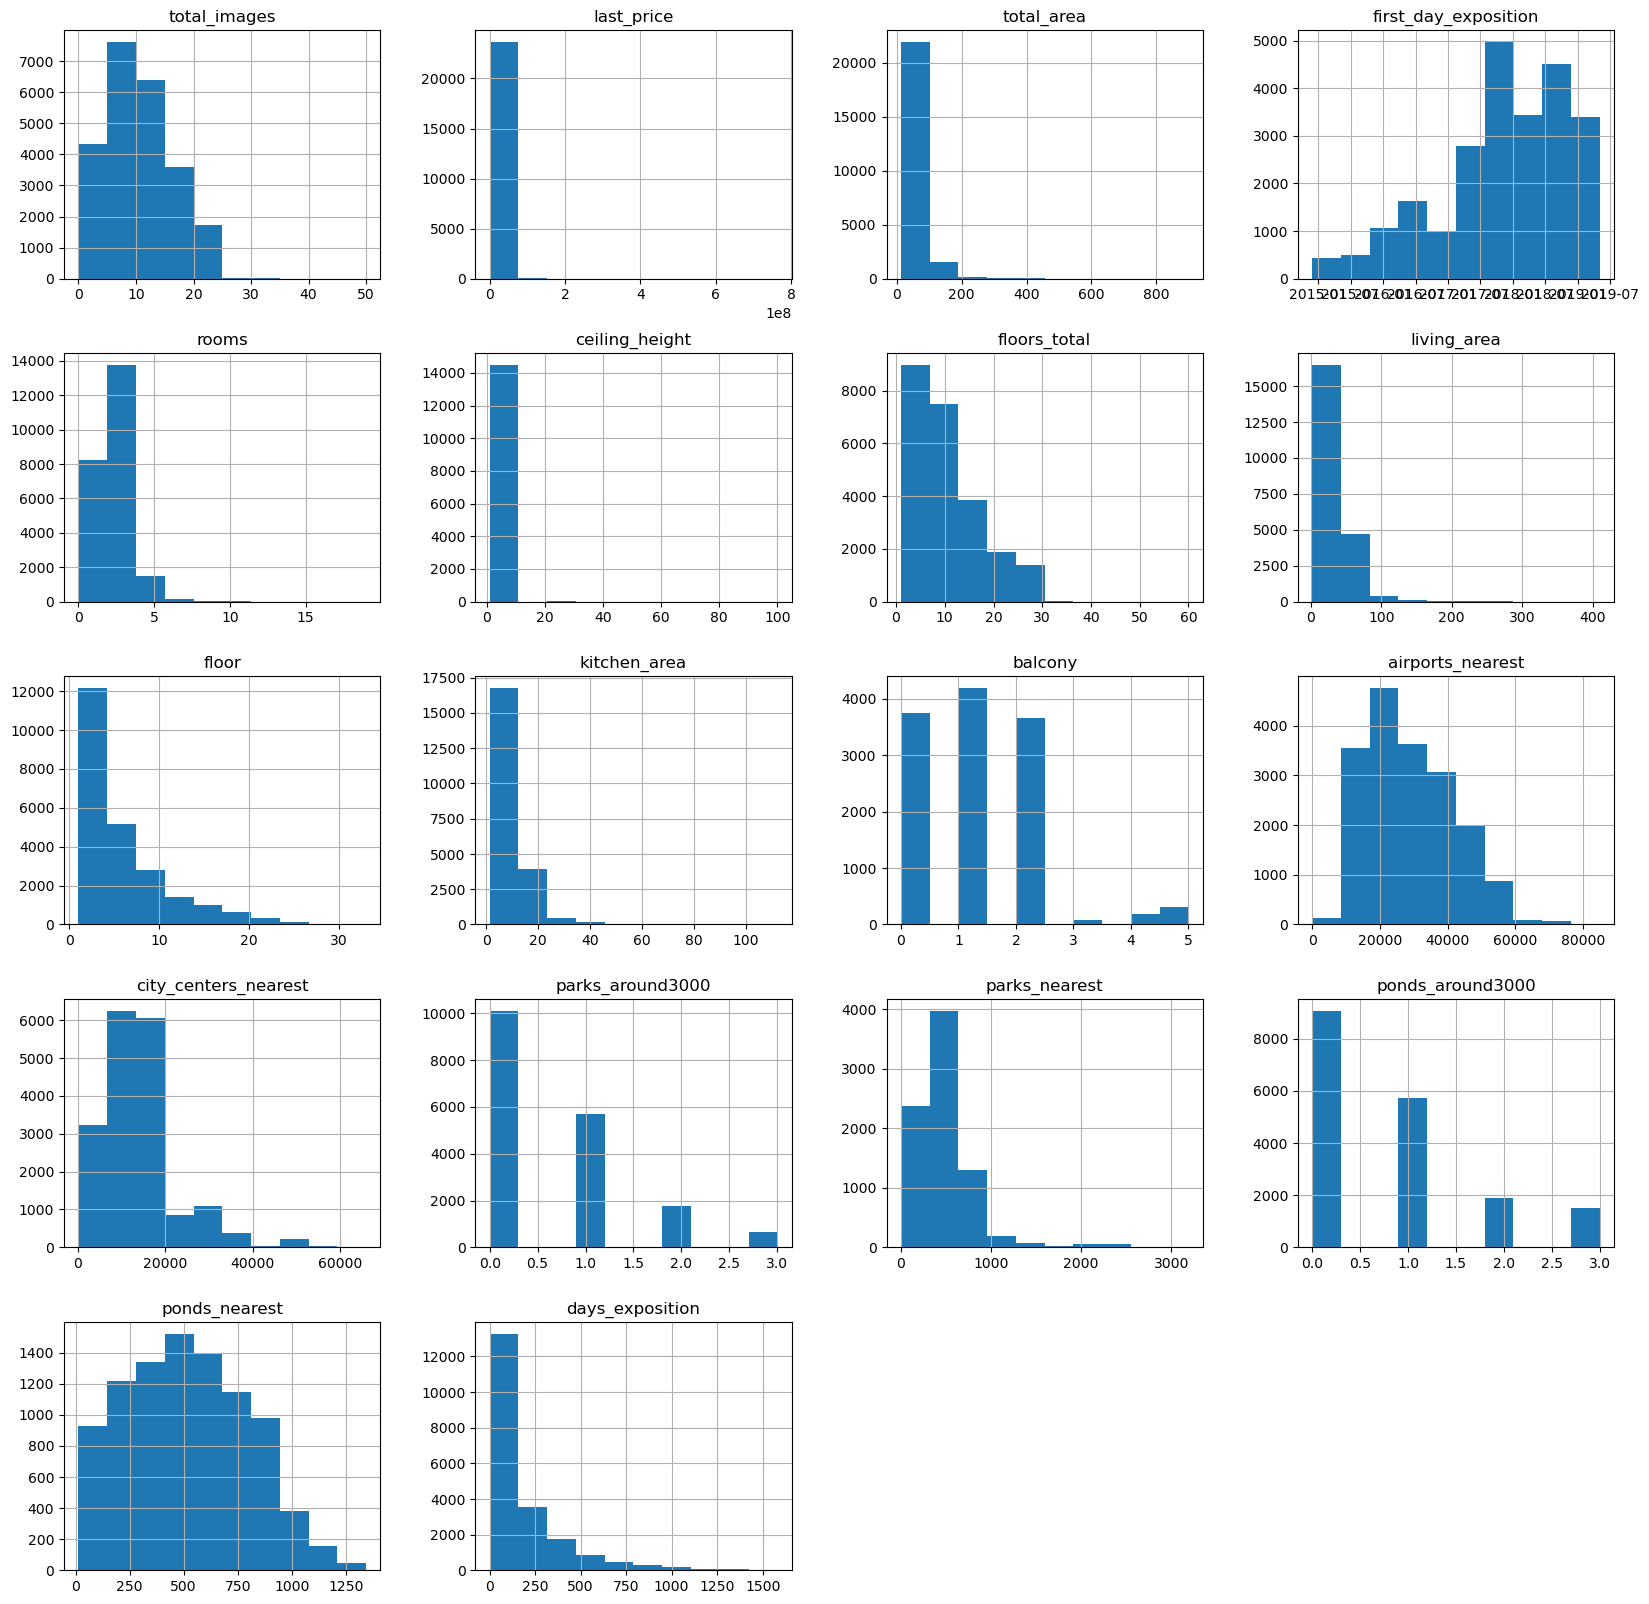

In [14]:
# построим гистораммы для оценки разброса данных
data.hist(figsize=(20, 20))
plt.show()

Оценив гистограммы, считаю необходимым очистить датасет от аномальных цифр, которые могут искажать усредненные данные. Тем более, что выбросов данных не много, и их исключение должно только положительно сказаться на проводимом исследовании. А также нужно заполнить отсутствующие данные, где это возможно.

#### 2.1. Балконы

In [15]:
#заполним пропущенные данные о количестве балконов
data['balcony'] = data['balcony'].fillna(0)
data['balcony'].isna().sum()

0

#### 2.2. Высота потолков

In [16]:
#заполним пропущенные данные о высоте потолков медианным значением:
med_ceiling_height = data['ceiling_height'].median()
data['ceiling_height'] = data['ceiling_height'].fillna(med_ceiling_height)

In [17]:
#также встречаются потолки более 5 метров, что нетипично для квартиры, и несколько строк с высотой около 1 метра. 
#Оценим количество таких данных
data.loc[(data['ceiling_height'] >= 5)|(data['ceiling_height'] <2), 'ceiling_height'].count()

40

In [18]:
#заменим данные на медианную величину высоты потолков в регионе исследования
data.loc[(data['ceiling_height'] >= 5)|(data['ceiling_height'] <2), 'ceiling_height']=med_ceiling_height

In [19]:
data['ceiling_height'].describe()

count    23699.000000
mean         2.695946
std          0.214990
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.900000
Name: ceiling_height, dtype: float64

#### 2.3. Обработка названий населенных пунктов

In [20]:
# проверим наличие неявных дубликатов в названиях н.п.:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [21]:
#заменим дублирующие друг друга названия н.п. и назовем все "посёлок":
data['locality_name'] = data['locality_name'].replace(['поселок', 'поселок станции', 'посёлок при железнодорожной станции', 'посёлок станции', 'городской посёлок', 'посёлок'], 'пос.', regex=True)

In [22]:
# Удалим строки без наименования н.п., информацию для анализа они не несут. Ведь вообще не понятно где эти квартиры находятся.
data = data.dropna(subset=['locality_name'])

In [23]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской пос. Большая Ижора', 'городской пос. Янино-1',
       'деревня Агалатово', 'деревня Аро', 'деревня Батово',
       'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Большое Рейзино', 'деревня Большой Сабск', 'деревня Бор',
       'деревня Борисова Грива', 'деревня Ваганово', 'дер

#### 2.4. Срок публикации объявления

In [24]:
#округлим данные в столбце для более презентабельного вида.
data['days_exposition'] = data['days_exposition'].round(0)

Отсутсвие значения в колонке "days_exposition" можно рассматривать, как случай, когда объявление о продаже было еще активно на момент выгрузки данных.

#### 2.5. Жилая площадь и площадь кухни

Пропуски в значениях о площадях вызваны, скорее всего, незаполнением их на этапе ввода объявления. Так же можно предположить, что отсутствие данных о площади кухни связано с квартирами, где комнаты объединены с кухней и площадь комнаты уже включает площадь кухни.   
Учитывая тот факт, что пропусков по этим столбцам менее 10%, а данные имеют значение для определения корректной рыночной стоимости, оставим данные без изменений. Заполнить пропущенные значения нечем. Оставим пропуски.

#### 2.6. Этажность дома

In [25]:
data['floors_total'].isna().sum()

85

Учитывая несущественное количество пропусков предлагаю оставить их не заполненными. По сути, узнать этажность дома достоверно мы не можем.  
Можно заполнить пропуск значением, равным этажу расположения квартиры, но это исказит дальнейший анализ при категоризации этажей расположения квартир и влиянии этого критерия на цену (искусственно увеличим долю квартир на последнем этаже).

#### 2.7. Расстояния от объектов недвижимости до аэропорта, парков и прудов

Сведения получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.   
Этот блок данных оказался вообще некачественно заполнен. Или данные были потеряны при выгрузке. Об этом нужно сообщить оответственным за выгрузку.  
Заполнить пропуски нечем, оставим исходные данные.

### Вывод:
Данные подготовлены к проведению анализа.  
Изменили типы данных, где это требовалось.  
Наименования столбцов приведены к единому стилю.  
Обработаны явные и неявные дубликаты.  
Заполнили пропуски, где это было возможно.  

## Шаг 3. Добавление параметров

#### 3.1. Рассчитаем стоимость одного квадратного метра для каждого объекта:

In [26]:
data['metr_price'] = (data['last_price']/data['total_area']).round(2)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,metr_price
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,True,...,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,True,...,2.0,пос. Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,True,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,True,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,...,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00


In [27]:
data['metr_price'].describe()

count    2.365000e+04
mean     9.943225e+04
std      5.033794e+04
min      1.118300e+02
25%      7.661496e+04
50%      9.500000e+04
75%      1.142742e+05
max      1.907500e+06
Name: metr_price, dtype: float64

Средняя рыночная стоимость составляет 99 432 руб, при этом медианное значение незначительно отличается (95000руб), что позволяет сделать вывод об отсутсвии выбросов либо их несущественном влиянии на анализ.  
Также в данных выявлены аномально малые значения стоимости за квадратный метр. Избавимся от этих строк и оценим данные еще раз.

In [28]:
data = data[data['metr_price']>10000]
data['metr_price'].describe()

count    2.364700e+04
mean     9.944411e+04
std      5.033008e+04
min      1.018519e+04
25%      7.663535e+04
50%      9.500000e+04
75%      1.142814e+05
max      1.907500e+06
Name: metr_price, dtype: float64

#### 3.2. Когда была публикация объявления

In [29]:
#Добавим данные о порядковом номере дня публикации:
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,metr_price,weekday,month,year
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,True,...,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,True,...,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,True,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,True,...,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018


#### 3.3. Тип этажа квартиры 

Разобьем этажность продаваемых квартир на 3 категории: "первый", "последний", "другой".

In [30]:
def floor_cat(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'

In [31]:
data['floor_category'] = data.apply(floor_cat, axis=1)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,metr_price,weekday,month,year,floor_category
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,True,...,1.0,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,True,...,0.0,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,True,...,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,True,...,2.0,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,...,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой


#### 3.4. Расстояние до центра города

Переведём расстояние из исходного датасета в км и поместим значения  в новую колонку:

In [32]:
data['city_centers_km'] = (data['city_centers_nearest']/1000).round()
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,metr_price,weekday,month,year,floor_category,city_centers_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,True,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,True,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,True,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,True,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0


In [33]:
data['city_centers_km'].isna().sum()

5509

В обрабатываемой колонке очень много пропусков, порядка 25%. Но заполнить эти пропуски нечем - какие-либо сведения о расстояниях в этих городах/н.п. отсутсвуют полностью, поэтому вывести среднее или медианное значение для заполнения пропусков не представляется возможным.

### 4. Исследовательский анализ данных

#### 4.1. Общая площадь

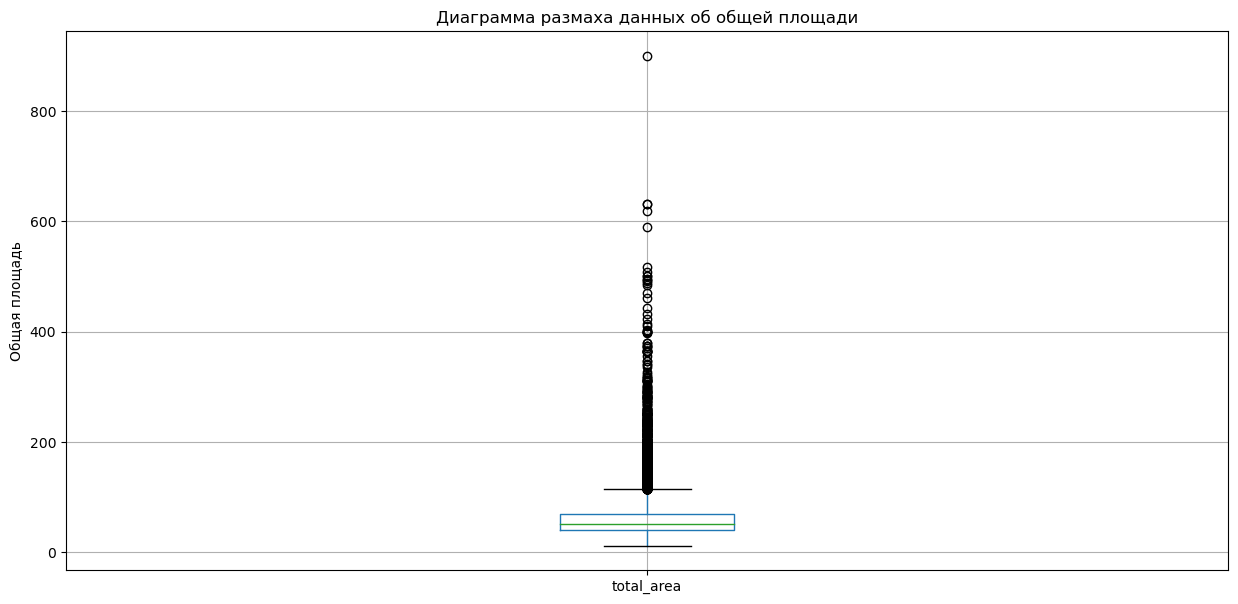

In [34]:
data.boxplot(column=['total_area'], figsize=(15,7), grid=True)
plt.ylabel('Общая площадь')
plt.title('Диаграмма размаха данных об общей площади')
plt.show()

На отраженной выше диаграмме размаха можно отметить следующие факты:  
- медианное значение находится на уровне отметки в 50 кв м, что является вполне нормальным;
- в размах "усов" диаграммы попадают нормальные значения: считаю вполне приемлимым исключить из дальнейшего анализа объекты с площадью больше 110 кв.м., т.к. такая квадратура представлена в ничтожно малых количествах на рынке недвижимости, и не дает объективную оценку для определения рыночной цены. Такие площади больше характерны для жилых домов или квартир более высокого класса.  
- межквартильный размах (Q1-Q3) очень отчетливо отражает действительность типичного рынка недвижимости: квартиры 40-70 кв метров - это типовая застройка (2-х и 3-х комнатные квартиры).

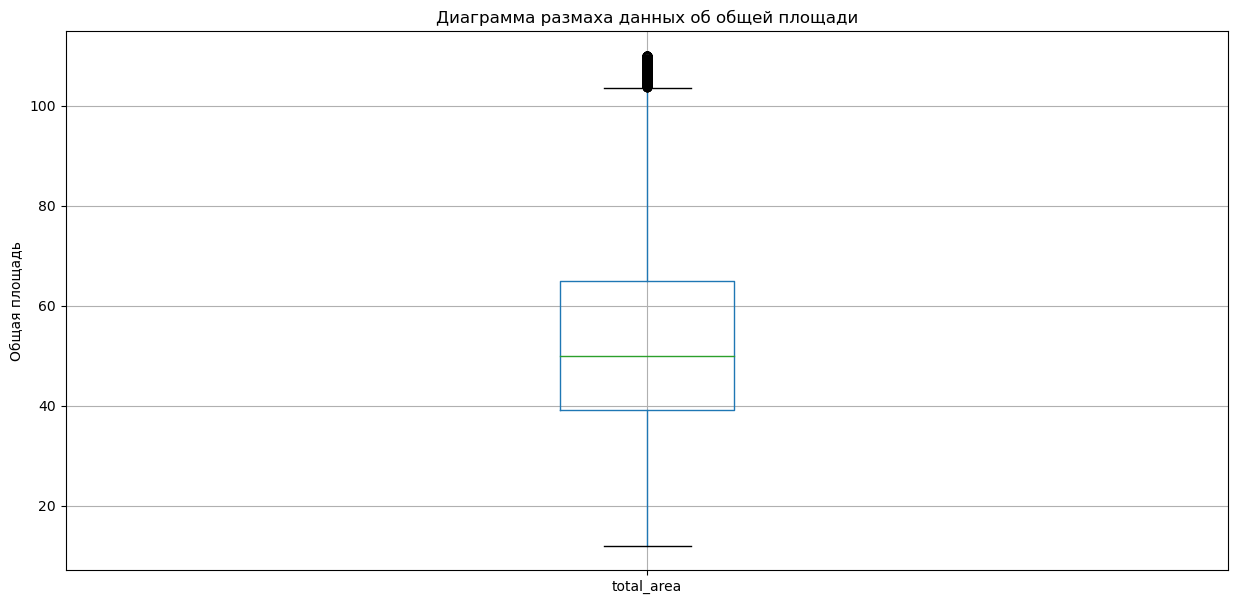

Text(0, 0.5, 'Количество предложений')

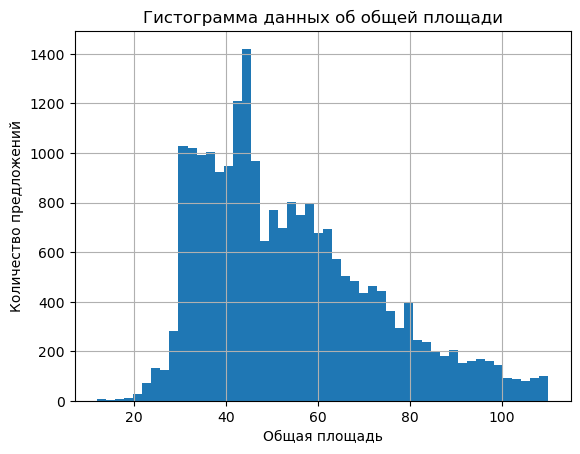

In [35]:
data = data.query('total_area<=110.0')
data.boxplot(column=['total_area'], figsize=(15,7), grid=True)
plt.ylabel('Общая площадь')
plt.title('Диаграмма размаха данных об общей площади')
plt.show()
data['total_area'].hist(bins=50)
plt.title('Гистограмма данных об общей площади')
plt.xlabel('Общая площадь')
plt.ylabel('Количество предложений')

На графике выше видно, что основная масса продающихся квартир - примерно 45 кв м. Стандартная "двушка".  
Небольшое количество квартир с площадью до 30 кв м - скорее всего малогабаритные "студии" или комнаты в общежитиях.  
Распределение данных носит вполне реалистичный характер.

#### 4.2. Жилая площадь

Text(0, 0.5, 'Количество предложений')

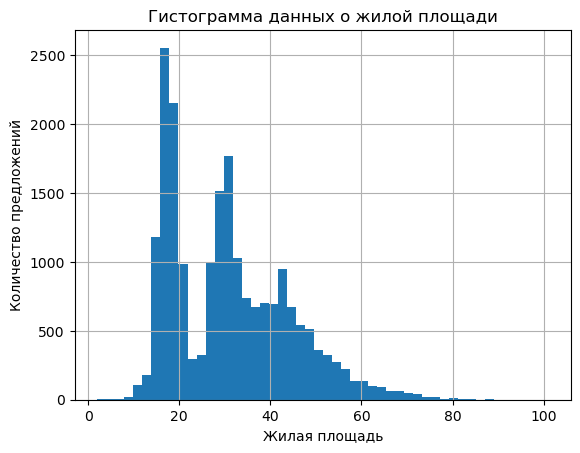

In [36]:
data['living_area'].hist(bins=50)
plt.title('Гистограмма данных о жилой площади')
plt.xlabel('Жилая площадь')
plt.ylabel('Количество предложений')

График "жилой площади" отражает данные исходя из общей площади квартир. Высокий всплеск на отметке 15-20 кв м - это те же "двушки" и комнаты в общежитиях.   
А вот провал в значениях после 20 кв м - скорее всего вызван отсутсвием данных в анализируемой колонке. Думаю, это пропущенные значения при заполнении данных о квартирах-студиях. Т.к. по этим же строкам отсутсвуют значения о площаде кухни.

#### 4.3. Площадь кухни

Text(0, 0.5, 'Количество предложений')

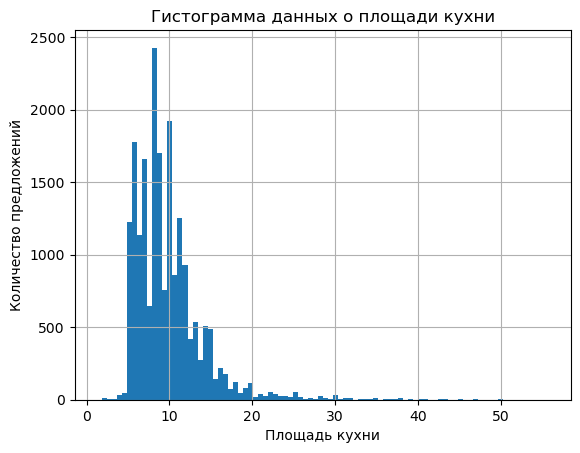

In [37]:
data['kitchen_area'].hist(bins=90)
plt.title('Гистограмма данных о площади кухни')
plt.xlabel('Площадь кухни')
plt.ylabel('Количество предложений')

Присутсвует разброс данных.  
Оценим данные на диаграмме размаха

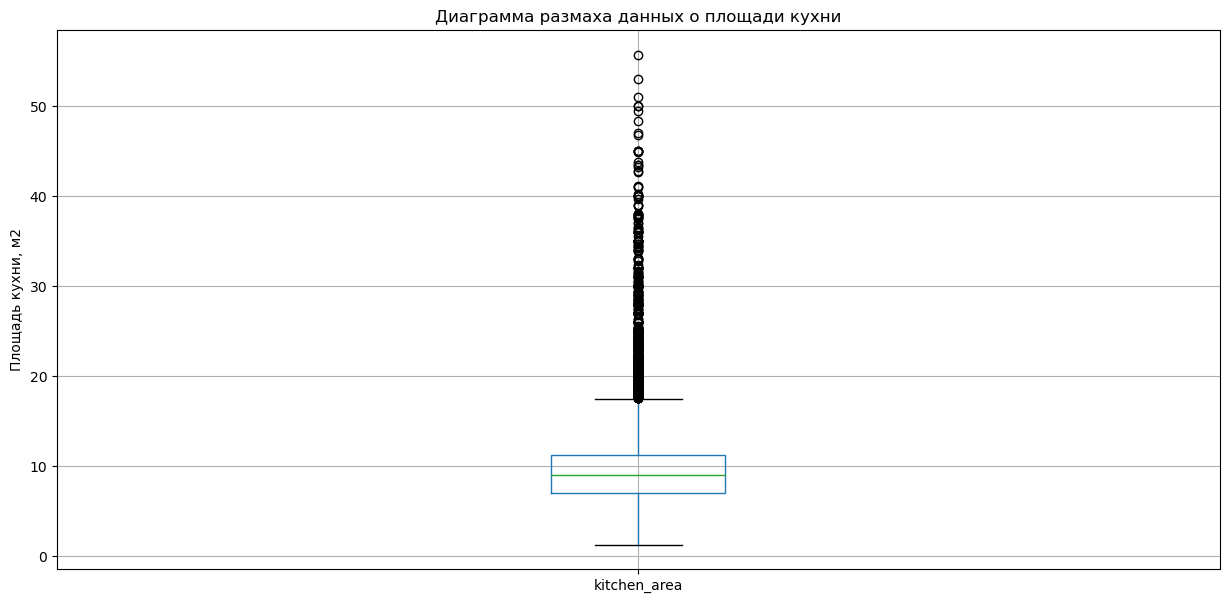

In [38]:
data.boxplot(column=['kitchen_area'], figsize=(15,7), grid=True)
plt.ylabel('Площадь кухни, м2')
plt.title('Диаграмма размаха данных о площади кухни')
plt.show()

Основная масса объектов имеют вполне реальную площадь кухни - от 5 до 15 кв м. Самый распространенный типовой вариант планировки квартиры включает в себя кухню ~10 кв м, что подтверждает график.
Кухни, площадью до 3 кв м и свыше 18 кв м, выходят за рамки нормального распределения. Но, для полного и объективного анализа постараюсь оставить максимальное количество исходных данных.   
  
  
Построим график предложений квартир на продажу с площадью кухни в рамках нормального распределения для наглядности. Объекты с большой площадью предствлены на рынке не с такой частотностью и представляют собой или выбросы, или очень эксклюзивные варианты.

Text(0, 0.5, 'Количество предложений')

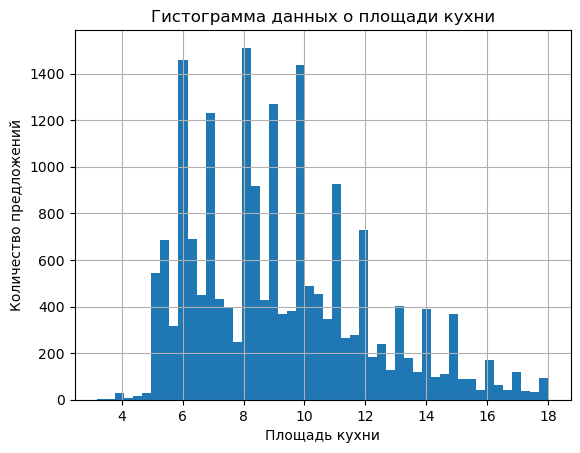

In [39]:
data['kitchen_area'][(data['kitchen_area']<=18)&(data['kitchen_area']>3)].hist(bins=50)
plt.title('Гистограмма данных о площади кухни')
plt.xlabel('Площадь кухни')
plt.ylabel('Количество предложений')

Характерная картинка: наибольшее число предложений со стандартными кухнями - 5, 7, 8, 10 кв метров.

#### 4.4. Цена объекта

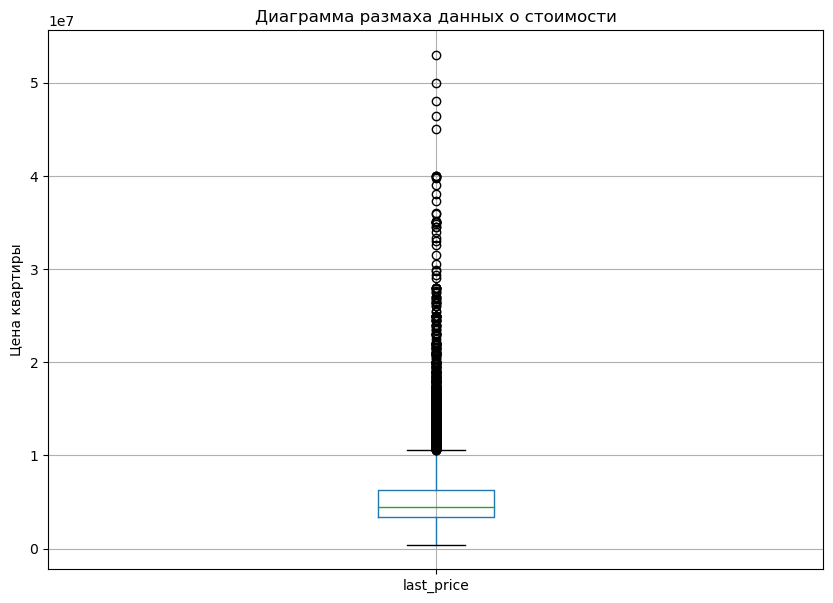

In [40]:
data.boxplot(column=['last_price'], figsize=(10,7), grid=True)
plt.ylabel('Цена квартиры')
plt.title('Диаграмма размаха данных о стоимости')
plt.show()

Отбросим выбивающиеся значения по цене, т.к. они усложнят анализ и негативно влияют на распределение значений. Очевидно, что стоимость квартир свыше 20 млн. встречается редко, возможно это какие-то элитные квартиры в исторических зданиях или с нетипичной площадью.

In [41]:
data = data[data['last_price']<=20000000]

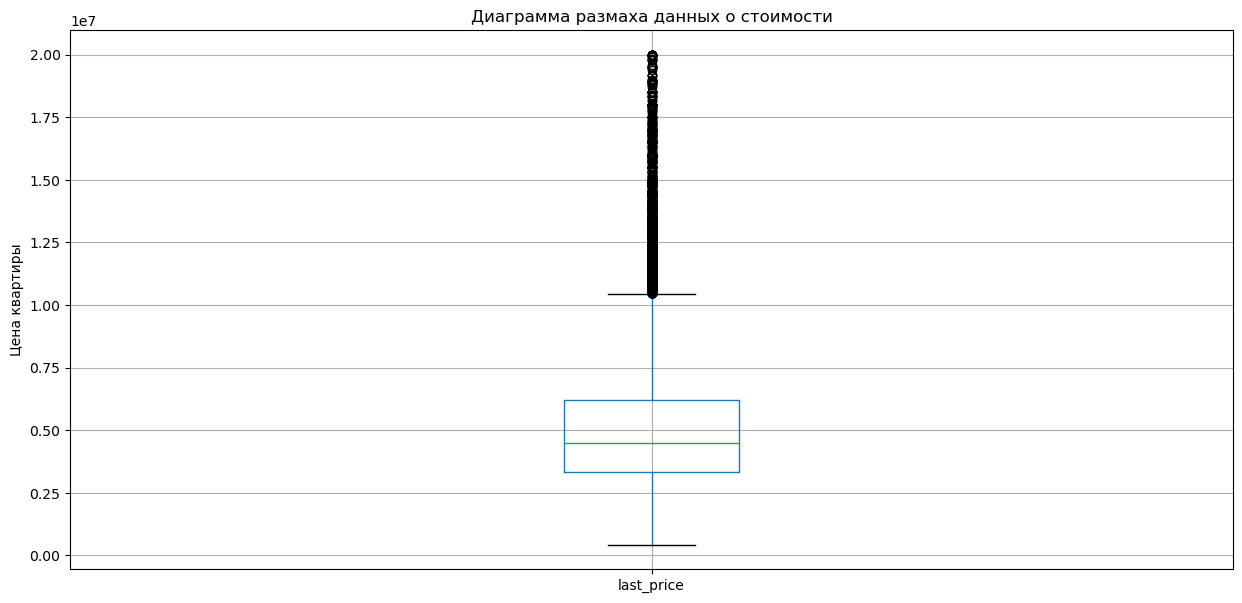

In [42]:
data.boxplot(column=['last_price'], figsize=(15,7), grid=True)
plt.ylabel('Цена квартиры')
plt.title('Диаграмма размаха данных о стоимости')
plt.show()

In [43]:
data['last_price'].describe()

count    2.215300e+04
mean     5.131682e+06
std      2.790694e+06
min      4.300000e+05
25%      3.350000e+06
50%      4.500000e+06
75%      6.200000e+06
max      2.000000e+07
Name: last_price, dtype: float64

Диаграмма размаха выглядит "чистой".  
Средняя стоимость квартир находится на уровне 5,1 млн руб. Медианное значение немного ниже (4,5 млн), что может быть вызвано большой разницей в стоимости недвижимости в зависимости от населенных пунктов. Очевидно же, что стоимость квартиры в СПб может превышать стоимость жилья в каком-то снт.

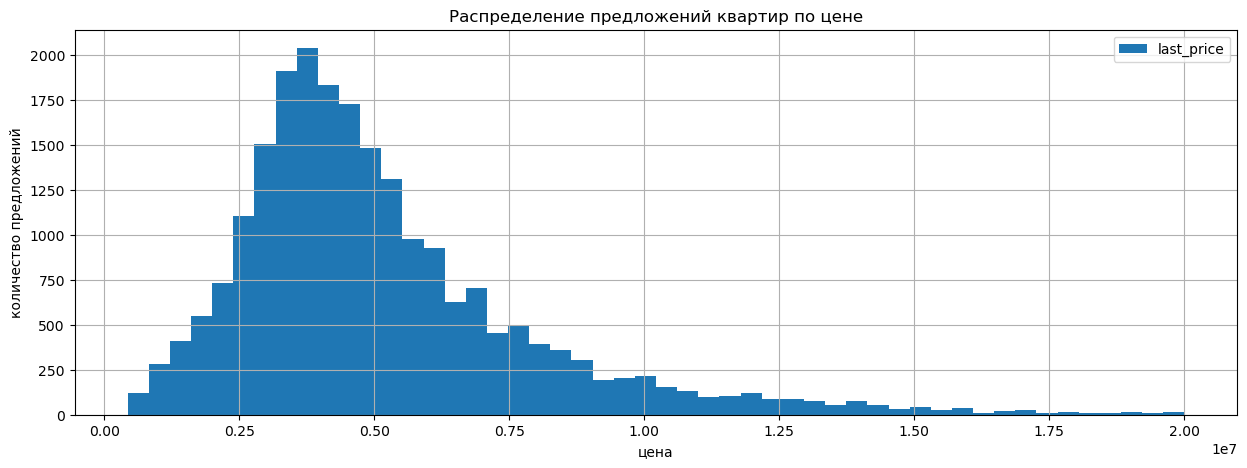

In [44]:
#оценим рынок недвижимости еще раз на графике
data.plot(kind='hist', y='last_price', title='Распределение предложений квартир по цене',grid=True, bins=50, figsize=(15,5))
plt.ylabel('количество предложений')
plt.xlabel('цена')
plt.show()

Гистограмма позволяет рассмотреть ценовой диапазон более детально: основная масса квартир продается по цене от 3 до 5 млн руб. Тем самым подтверждается гипотеза о высокой стоимости квартир в отдельных городах по сравнению с общей массой и влияние этих цен на среднее значение.

#### 4.5. Количество комнат

Text(0.5, 1.0, 'Количество комнат')

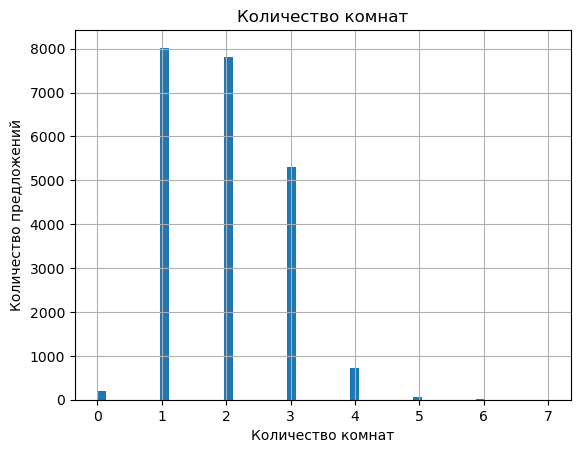

In [45]:
data['rooms'].hist(bins=50)
plt.xlabel('Количество комнат')
plt.ylabel('Количество предложений')
plt.title('Количество комнат')

Основная масса представленных на рынке квартир - это 1-2-3 комнатные. Есть небольшой процент 4-комнатных (чуть более 1000 объявлений). Остальные виды представлены в очень малом количестве.

#### 4.6. Высота потолков

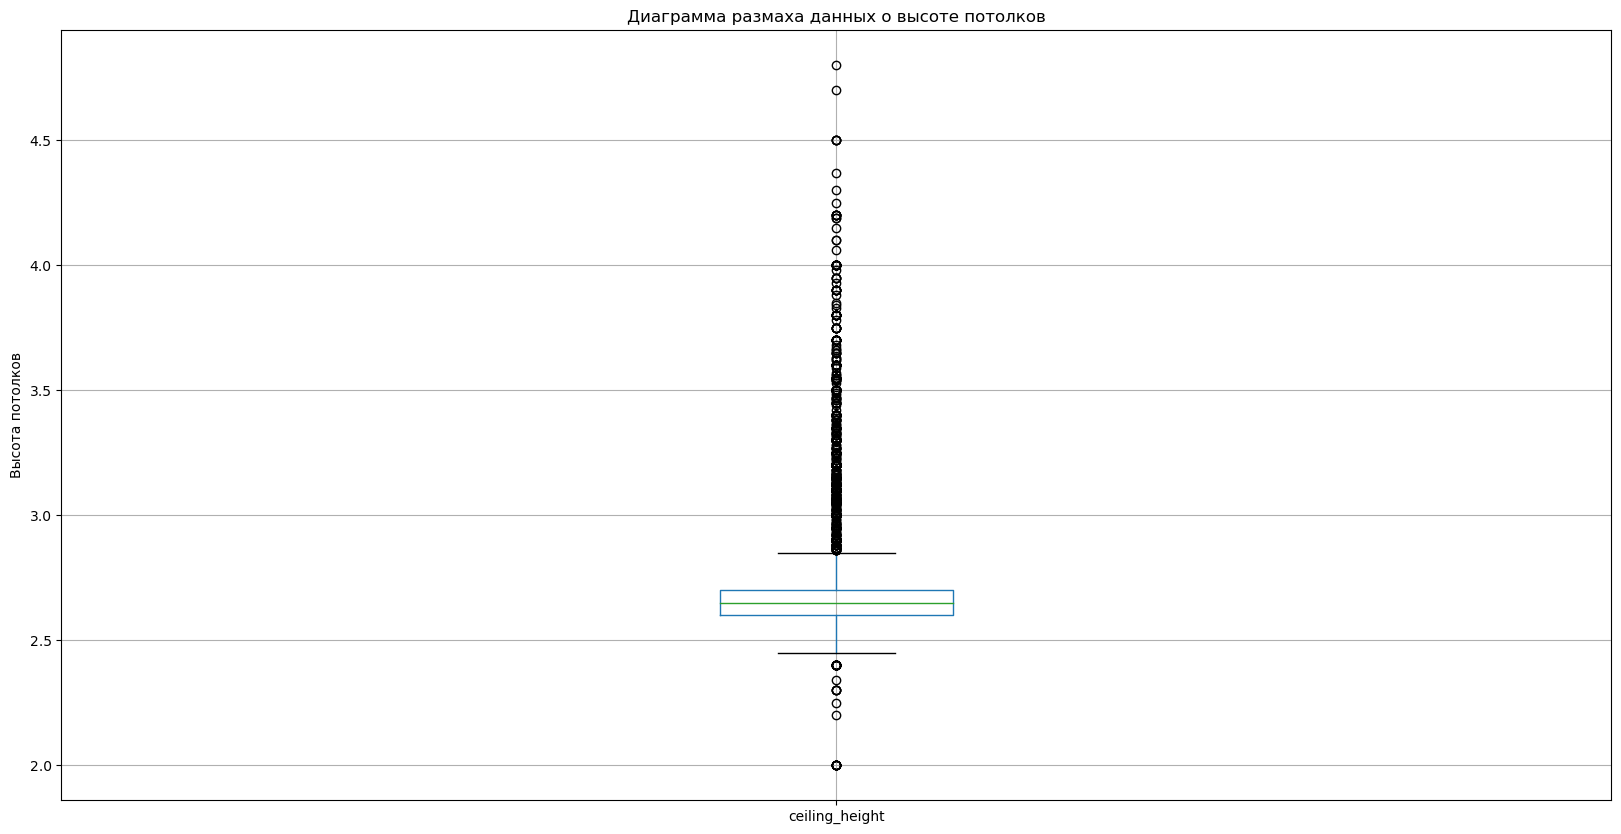

In [46]:
data.boxplot(column=['ceiling_height'], figsize=(20,10), grid=True)
plt.ylabel('Высота потолков')
plt.title('Диаграмма размаха данных о высоте потолков')
plt.show()

Разброс в данных достаточно большой для исследуемого показателя, но носит вполне реалистичный характер. Некоторые отсутствующие данные были заполнены медианным значением, это не должно негативно повлиять на анализ, т.к. высота потолков - это стандартизированная величина.

Text(0.5, 1.0, 'Высота потолков')

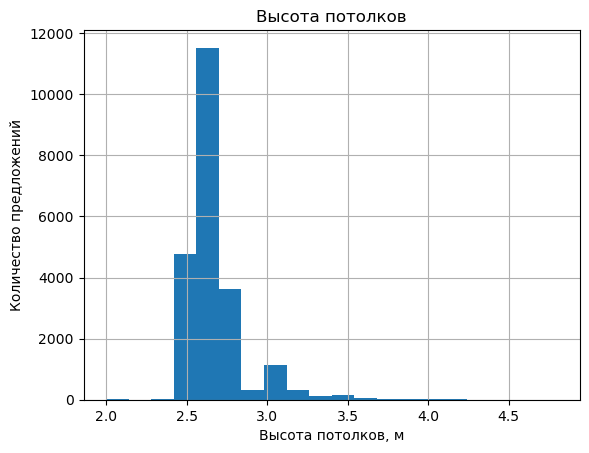

In [47]:
data['ceiling_height'].hist(bins=20)
plt.xlabel('Высота потолков, м')
plt.ylabel('Количество предложений')
plt.title('Высота потолков')

В основном, на рынке представлены квартиры со стандартной высотой потолков 2,5-2,8 м. 

#### 4.7. Тип этажа квартиры

In [49]:
# оценим кол-во объявлений в каждой категории
data['floor_category'].value_counts()

floor_category
другой       16306
последний     3036
первый        2811
Name: count, dtype: int64

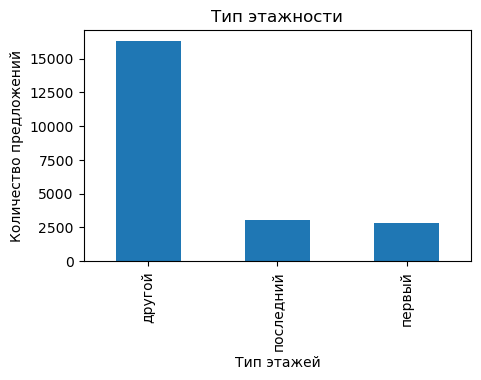

In [50]:
data['floor_category'].value_counts().plot.bar(figsize=(5, 3))
plt.xlabel('Тип этажей')
plt.ylabel('Количество предложений')
plt.title('Тип этажности')
plt.show()

Можно сделать вывод, что количество квартир, продающихся на первом или последнем этажах, примерно одинаковая. Однако, на практике такие квартиры пользуются меньшей популярностью. 

#### 4.8. Общее количество этажей в доме

In [51]:
data['floors_total'].describe()

count    22075.000000
mean        10.803715
std          6.640760
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

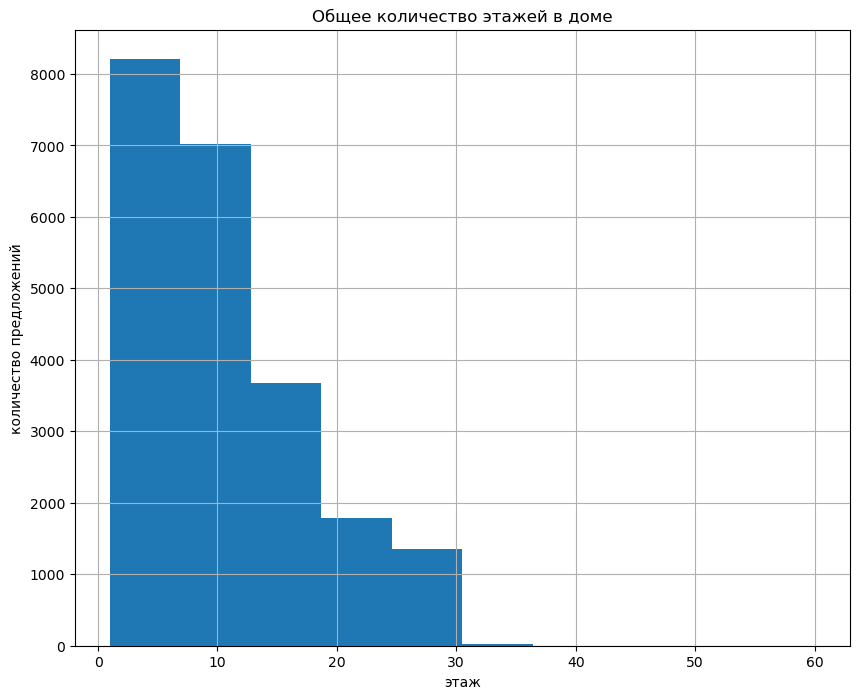

In [52]:
data['floors_total'].hist(bins=10,  figsize=(10, 8))
plt.title('Общее количество этажей в доме')
plt.xlabel('этаж')
plt.ylabel('количество предложений')
plt.show()

Большинство объектов недвижимости расположены в 5-ти и 9-10-ти-этажных домах. Высотные дома встречаются реже. Медианное значение = 9, подтверждает описание графика.

#### 4.9. Расстояние до центра города

Text(0.5, 1.0, 'Расстояние до центра города')

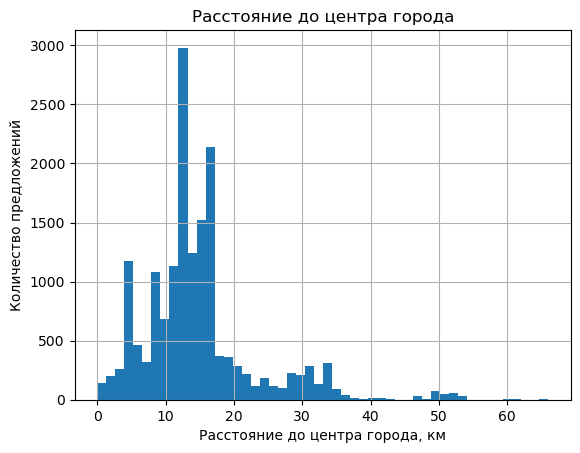

In [53]:
data['city_centers_km'].hist(bins=50)
plt.xlabel('Расстояние до центра города, км')
plt.ylabel('Количество предложений')
plt.title('Расстояние до центра города')

Больше всегоо объявлений о продаже квартиры в радиусе примерно 13-15 км от центра.  
Удаленность от центра города более, чем на 35 км, даже для СПб является "удешевляющим" фактором. 

#### 4.10. Расстояние до ближайшего парка

В ходе ознакомления с данными было выявлено очень много пропущенных сведений в данных о расстоянии до объектов - некачественные данные от географических сервисов, т.к. эти данные заполняются автоматически, без участия пользователя.

Text(0.5, 1.0, 'Расстояние до ближайшего парка')

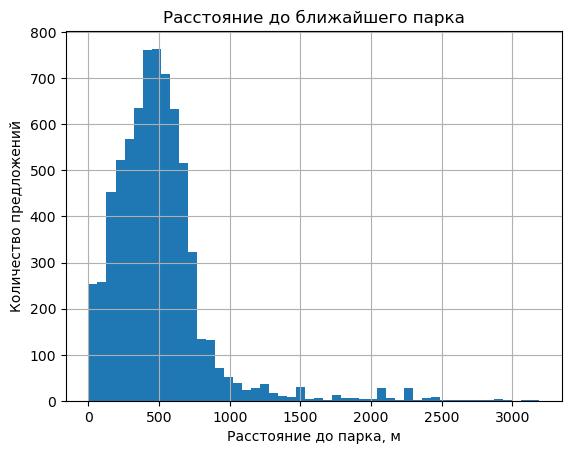

In [54]:
data['parks_nearest'].hist(bins=50)
plt.xlabel('Расстояние до парка, м')
plt.ylabel('Количество предложений')
plt.title('Расстояние до ближайшего парка')

Если отразить имеющиеся данные, можно сделать вывод, что поблизости многих объектов имеется парк: от вариата "рядом с домом" до радиуса в 1 км. Остальные значения имеют нечастое упоминание в объявлениях.

#### 4.11. Срок продажи

Оценим как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление.

In [55]:
data['days_exposition'].describe()

count    19352.000000
mean       173.908123
std        211.838606
min          1.000000
25%         44.000000
50%         92.000000
75%        220.000000
max       1580.000000
Name: days_exposition, dtype: float64

При первичном ознакомлении с данными было замечено, что некоторые объявления находились в поиске 1 день. Продажа квартиры за 1 день, конечно, возможна, но маловероятна. Зато некоторые объявления висели по 1500 дней(около 4 лет). Такие данные могут негативно сказаться на исследовании.  
Средняя продолжительность продажи составляет 170 дней (полгода). Выглядит вполне реалистично.   
Построим диаграмму размаха, чтобы отбросить аномально малые или большие периоды.

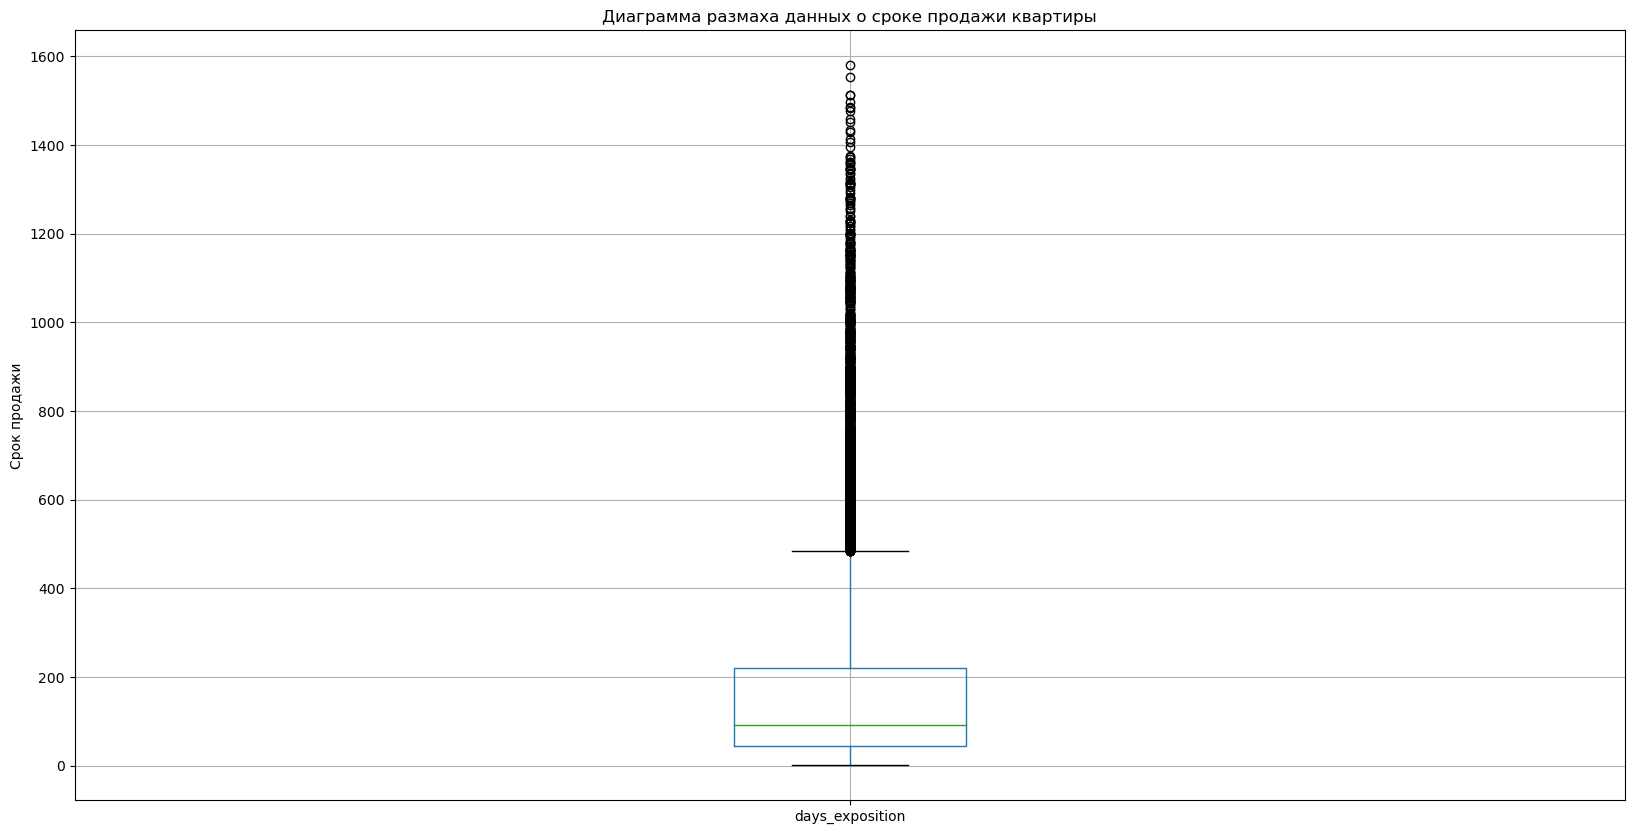

In [56]:
data.boxplot(column=['days_exposition'], figsize=(20,10), grid=True)
plt.ylabel('Срок продажи')
plt.title('Диаграмма размаха данных о сроке продажи квартиры')
plt.show()

Возьмем за отправную точку минимальный срок продажи в 1 день (это входит в рамки нормального распределения) и максимальный в 1,5 года(500 дней).
Оценим количество объявлений за рамками предлагаемой выборки.

In [57]:
data['days_exposition'][(data['days_exposition']>500)|(data['days_exposition']<1)].count()

1523

Доля таких объявлений не очень большая. Очистим выборку от длительных продаж.

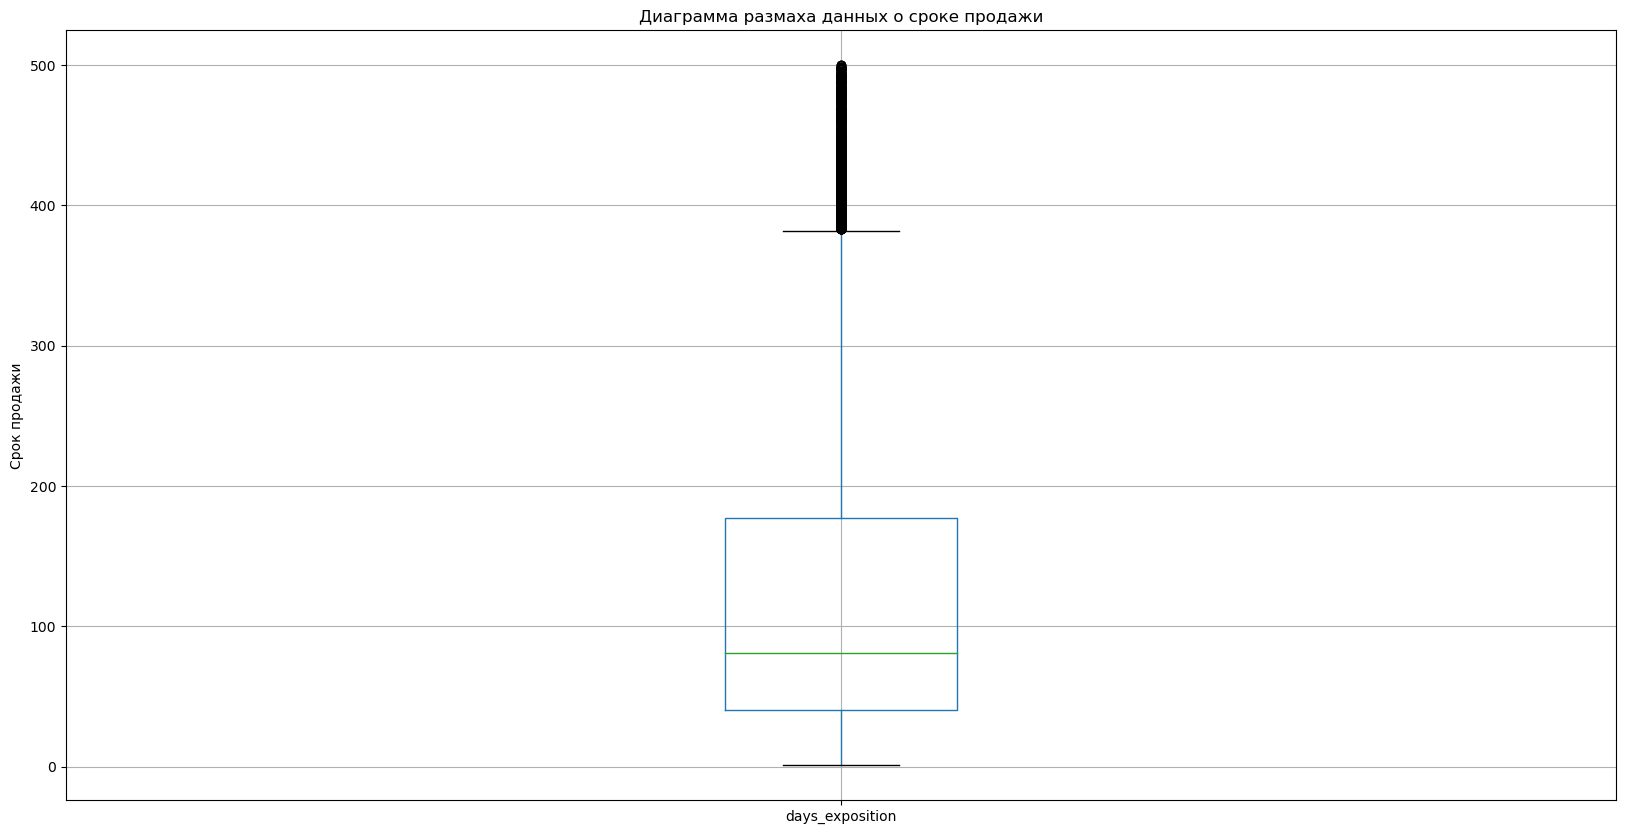

In [58]:
data = data[data['days_exposition']<=500]
data.boxplot(column=['days_exposition'], figsize=(20,10), grid=True)
plt.ylabel('Срок продажи')
plt.title('Диаграмма размаха данных о сроке продажи')
plt.show()

In [59]:
data['days_exposition'].describe()

count    17829.000000
mean       124.709013
std        118.065114
min          1.000000
25%         40.000000
50%         81.000000
75%        177.000000
max        500.000000
Name: days_exposition, dtype: float64

После очистки данных медианное значение немного сместилось. 

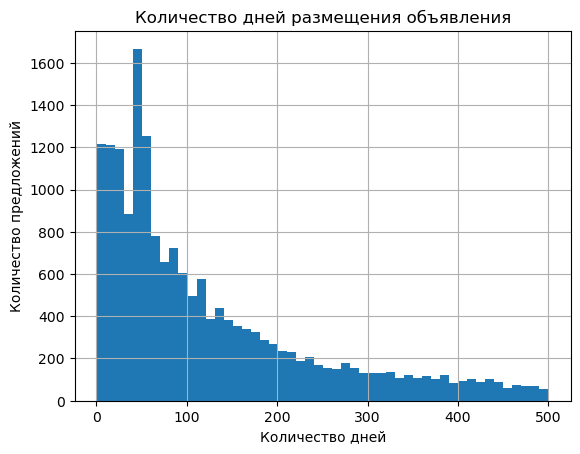

In [61]:
data['days_exposition'].hist(bins=50)
plt.xlabel('Количество дней')
plt.ylabel('Количество предложений')
plt.title('Количество дней размещения объявления')
plt.show()

В целом, "нормальная" продажа квартиры происходит в первые 3 месяца. Если зависает на дольше - значит не рыночная цена или непопулярное расположение. Но эти данные по долгопродающимся квартирам значительно сдвигают среднее значение от медианного.  
А вот быстрой продажу можно считать, если она произошла в первый месяц, до 40 дней после размещения объявления. Это значение находится на уровне первого квартиля Q1.

### 5. Факторы, влияющие на стоимость объекта

Оценим взаимосвязь данных

#### 5.1. Зависимость цены от общей площади

In [62]:
#посчитаем коэффициент корреляции
data['last_price'].corr(data['total_area'])

0.7183485975253264

<Axes: title={'center': 'Зависимость цены от общей площади'}, xlabel='общая площадь', ylabel='стоимость'>

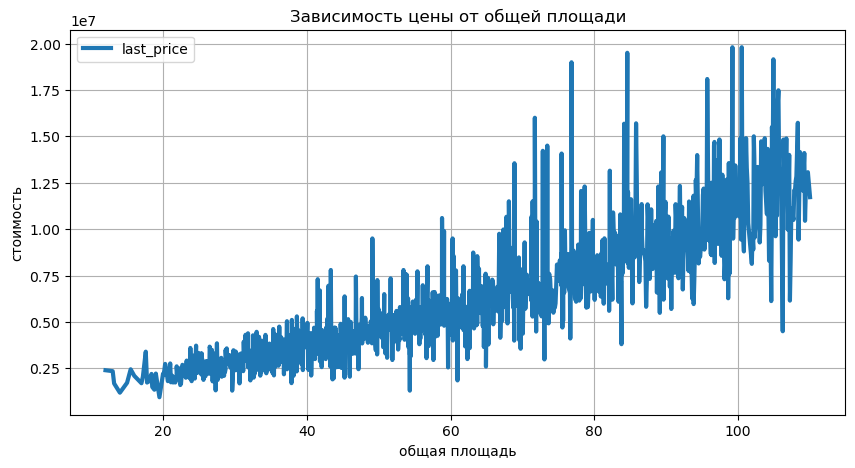

In [63]:
data.pivot_table(index='total_area', values=['last_price']).plot(grid=True, 
                                                              figsize=(10, 5),
                                                              linewidth=3,
                                                              title='Зависимость цены от общей площади',
                                                                xlabel='общая площадь', ylabel='стоимость')

Наблюдается тесная линейная взаимосвязь: с увеличением площади объекта растет и его цена. Абсолютно нормальное явление на рынке.

#### 5.2. Зависимость цены от жилой площади

In [64]:
#посчитаем коэффициент корреляции
data['last_price'].corr(data['living_area'])

0.5789043406398174

<Axes: title={'center': 'Зависимость цены от жилой площади'}, xlabel='жилая площадь', ylabel='стоимость'>

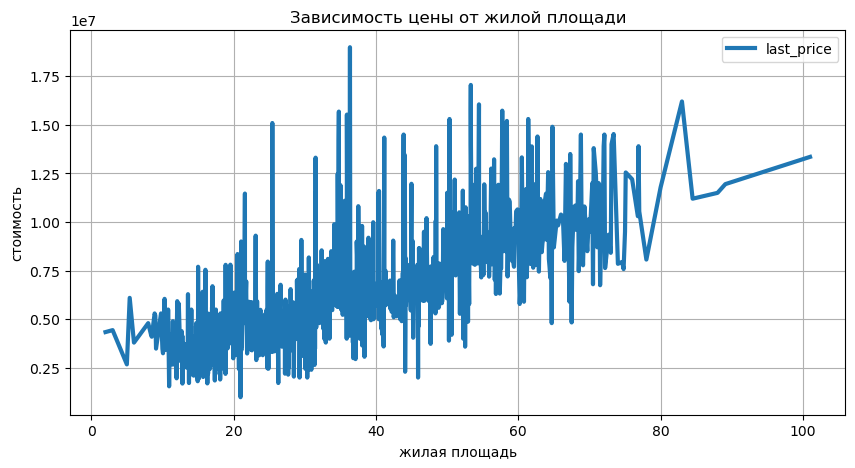

In [65]:
data.pivot_table(index='living_area', values=['last_price']).plot(grid=True, 
                                                              figsize=(10, 5),
                                                              linewidth=3,
                                                              title='Зависимость цены от жилой площади',
                                                                 xlabel='жилая площадь', ylabel='стоимость')

Так же тесная линейная взаимосвязь: с увеличением площади объекта увеличивается и жилая площадь, что ведет к увеличению его цены.

#### 5.3. Зависимость цены от  площади кухни

In [66]:
#посчитаем коэффициент корреляции
data['last_price'].corr(data['kitchen_area'])

0.5214468787056271

<Axes: title={'center': 'Зависимость цены от площади кухни'}, xlabel='площадь кухни', ylabel='стоимость'>

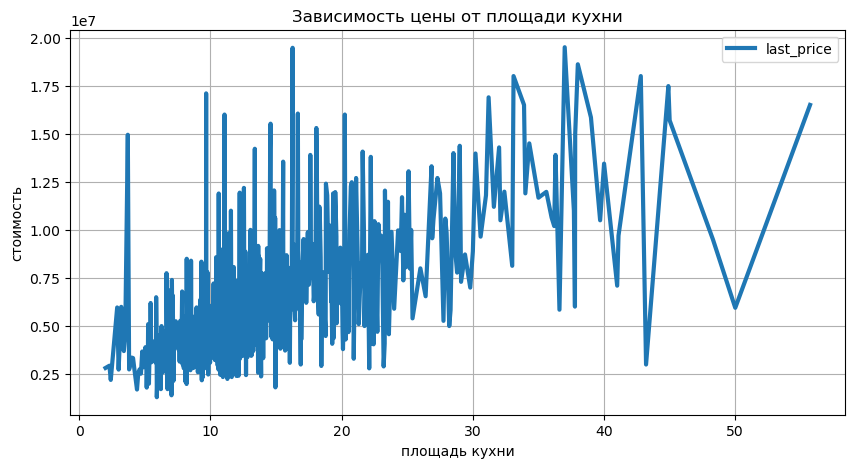

In [67]:
data.pivot_table(index='kitchen_area', values=['last_price']).plot(grid=True, 
                                                              figsize=(10, 5),
                                                              linewidth=3,
                                                              title='Зависимость цены от площади кухни',
                                                                  xlabel='площадь кухни', ylabel='стоимость')

Взаимосвязь, конечно, есть, но уже не такая тесная, как от общей площади. Большая кухня - это удобно, но не является ключевым критерией ценообразования.

#### 5.4. Зависимость цены от количества комнат

In [68]:
#посчитаем коэффициент корреляции
data['last_price'].corr(data['rooms'])

0.4324235397906533

Ситуация как и с площадью кухни. Взаимосвязь есть, но она не сильная. Тут скорее чем больше площадь, тем вероятнее увеличение количества комнат.

#### 5.5. Зависимость цены от этажа

In [69]:
data['last_price'].corr(data['floor'])

0.11489958104205975

<Axes: title={'center': 'Зависимость цены от этажа расположения'}, xlabel='floor'>

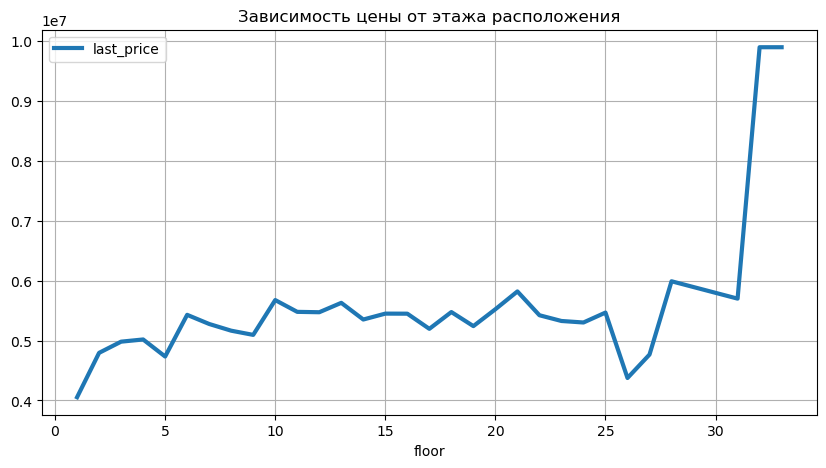

In [70]:
data.pivot_table(index='floor', values=['last_price']).plot(grid=True, 
                                                              figsize=(10, 5),
                                                              linewidth=3,
                                                              title='Зависимость цены от этажа расположения')

Прослеживается очень слабая зависимость цены от этажа расположения, т.к. коэффициент близок к 0.  
Единственный скачок - наверное, какая-то элитная квартира с высокой стоимостью в новеньком небоскребе.  


Но можно еще поискать зависимость на графике по медианному значению:


In [71]:
pivot_table_floor_category = data.pivot_table(index = 'floor_category',
                                              values = 'last_price',
                                              aggfunc = ['mean', 'count', 'median'])
pivot_table_floor_category.columns = ['mean', 'count', 'median']
pivot_table_floor_category

,mean,count,median
floor_category,,,
другой,5.177822e+06,13289,4500000.0
первый,4.052956e+06,2171,3700000.0
последний,4.636109e+06,2369,4000000.0


<Axes: xlabel='floor_category'>

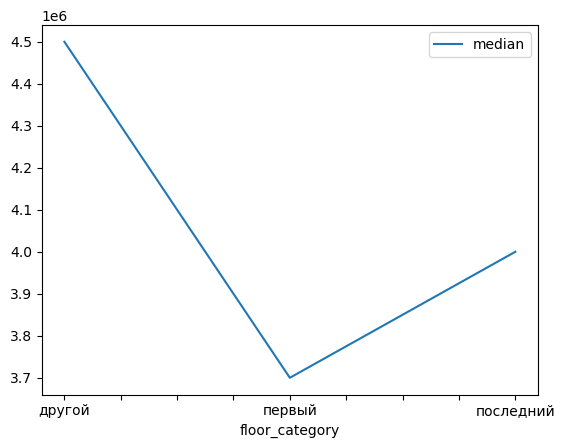

In [72]:
pivot_table_floor_category.plot(y = 'median', legend=True)

На таком графике видна зависимость цены от категории этажа: квартиры на первом этаже - самые дешевые, на последнем - в среднем ценовом диапазоне, а самые дорогие квартиры распологаются на средних этажах.

#### 5.6. Зависимость цены от даты размещения объявления

Построим графики по сводным таблицам общего числа объявлений в определенный период:

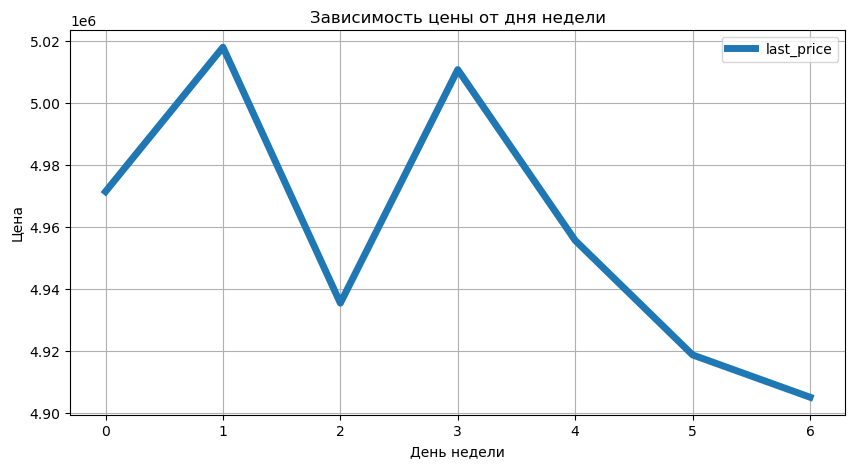

In [73]:
data.pivot_table(index='weekday', values=['last_price']).plot(grid=True, 
                                                              figsize=(10, 5),
                                                              linewidth=5,
                                                              title='Зависимость цены от дня недели')
plt.xlabel('День недели')
plt.ylabel('Цена')

plt.show()

График показывает, что объявления, размещенные в среду и воскресенье, содержали предложения с минимальными стоимостями квартир. Скорее всего, это просто совпадение.

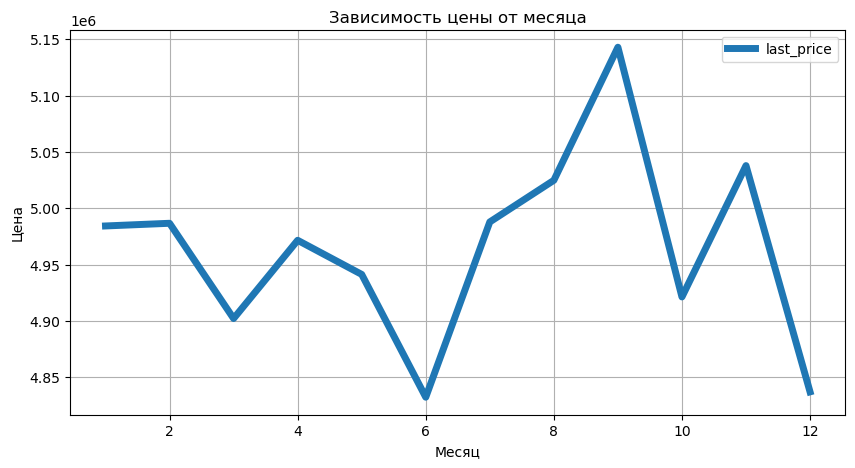

In [74]:
data.pivot_table(index='month', values=['last_price']).plot(grid=True, 
                                                              figsize=(10, 5),
                                                              linewidth=5,
                                                              title='Зависимость цены от месяца')
plt.xlabel('Месяц')
plt.ylabel('Цена')

plt.show()

Согласно распределения стоимости квартир по месяцам заметны существенные провалы в июне и декабре: в эти месяцы были проданы максимально дешевые квартиры. Пик по стоимости приходится на третий квартал.

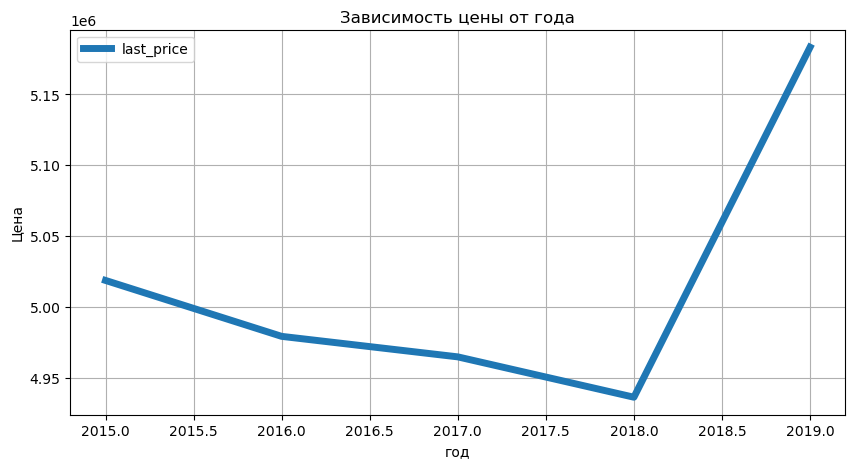

In [75]:
data.pivot_table(index='year', values=['last_price']).plot(grid=True, 
                                                              figsize=(10, 5),
                                                              linewidth=5,
                                                              title='Зависимость цены от года')
plt.xlabel('год')
plt.ylabel('Цена')

plt.show()

Отмечается стабильный рынок в 2015-2016 годах, в 2017 - начинается падение стоимости и достигается минимальных значений к началу 2018 г. Но, потом произошел стремительный рост цен до конца наблюдаемого периода 2019 года. Скорее всего, это обусловлено возросшим в тот период спросом на жилье в связи с появлением многих программ по поддержке в приобретении жилья, льготной ипотеки и ряда других факторов.

### 6. Анализ ТОП-10

Отберем 10 населённых пунктов с наибольшим числом объявлений.  
Постройте сводную таблицу с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов. 

In [77]:
top_local = data.pivot_table(index='locality_name', values=['first_day_exposition'], 
                             aggfunc='count').sort_values(by='first_day_exposition', 
                             ascending=False).head(10)
top_local

,first_day_exposition
locality_name,
Санкт-Петербург,11595
пос. Мурино,517
пос. Шушары,382
Всеволожск,305
Колпино,291
пос. Парголово,286
Пушкин,265
деревня Кудрово,265
Гатчина,241


In [78]:
top_local_pivot = data.query('locality_name in @top_local.index').pivot_table(
                              index='locality_name', values='metr_price').sort_values(by='metr_price', ascending=False)                       
top_local_pivot

,metr_price
locality_name,
Санкт-Петербург,107162.921652
Пушкин,100728.337962
деревня Кудрово,92585.904943
пос. Парголово,89360.980594
пос. Мурино,85983.765164
пос. Шушары,77964.172042
Колпино,74712.086220
Гатчина,68275.333651
Всеволожск,66807.553607


Как можно было и предположить, наиболее высокая средняя стоимость квадратного метра недвижимости находится в СПб на уровне 107 тыс руб. В Пушкино - ценник практически не отличается (в районе 100 тыс). А вот остальные города имеют более низкий порог стоимости за кв метр. Самая низкая средняя цена за кв метр в первой десятке лидеров продаж - в Выборге. Там средняя цена составляет всего 57 тыс руб.

### 7. Анализ стоимости жилья в СПб

Выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим их среднюю стоимость на разном удалении от центра

In [79]:
data_spb = data[data['locality_name']=='Санкт-Петербург']
data_spb

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,metr_price,weekday,month,year,floor_category,city_centers_km
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0
9,18,5400000.0,61.0,2017-02-26,3,2.50,9.0,43.6,7,True,...,NaN,0.0,NaN,289.0,88524.59,6,2,2017,другой,15.0
10,5,5050000.0,39.6,2017-11-16,1,2.67,12.0,20.3,3,True,...,310.0,2.0,553.0,137.0,127525.25,3,11,2017,другой,14.0
15,16,4650000.0,39.0,2017-11-18,1,2.65,14.0,20.5,5,True,...,590.0,1.0,296.0,19.0,119230.77,5,11,2017,другой,14.0
16,11,6700000.0,82.0,2017-11-23,3,3.05,5.0,55.6,1,True,...,420.0,0.0,NaN,397.0,81707.32,3,11,2017,первый,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23686,8,3300000.0,31.0,2017-04-29,1,2.55,9.0,18.0,6,True,...,140.0,1.0,317.0,193.0,106451.61,5,4,2017,другой,12.0
23687,6,3200000.0,39.0,2017-12-16,1,2.65,9.0,20.0,6,True,...,NaN,0.0,NaN,38.0,82051.28,5,12,2017,другой,17.0
23688,19,9200000.0,101.0,2019-04-01,3,3.05,15.0,63.0,12,True,...,NaN,0.0,NaN,23.0,91089.11,0,4,2019,другой,14.0
23689,13,3550000.0,35.3,2018-02-28,1,2.86,15.0,16.3,4,True,...,353.0,2.0,652.0,29.0,100566.57,2,2,2018,другой,16.0


In [80]:
data_spb['city_centers_km'].describe()

count    11578.000000
mean        12.208758
std          4.572059
min          0.000000
25%         10.000000
50%         13.000000
75%         15.000000
max         29.000000
Name: city_centers_km, dtype: float64

Для работы отобрано 9,5 тыс объявлений. Примем по умолчанию тот факт, что город СПб будем рассматривать в радиусе 30 км от центра. Разобьем объявления на группы по удаленности от центра города с шагом в 5 км.

In [81]:
def centr_cat(city_centers_km):
    if city_centers_km<5:
        return 'до 5 км'
    elif city_centers_km<10:
        return 'от 5 до 10 км'
    elif city_centers_km<15:
        return 'от 10 до 15 км'
    elif city_centers_km<20:
        return 'от 15 до 20 км'
    elif city_centers_km<25:
        return 'от 20 до 25 км'
    return 'свыше 25 км'

In [82]:
data_spb['centr_cat'] = data_spb['city_centers_km'].apply(centr_cat)
data_spb['centr_cat'].value_counts()

C:\Users\User\AppData\Local\Temp\ipykernel_2724\3534238582.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_spb['centr_cat'] = data_spb['city_centers_km'].apply(centr_cat)


centr_cat
от 10 до 15 км    4994
от 15 до 20 км    3339
от 5 до 10 км     1979
до 5 км            810
от 20 до 25 км     367
свыше 25 км        106
Name: count, dtype: int64

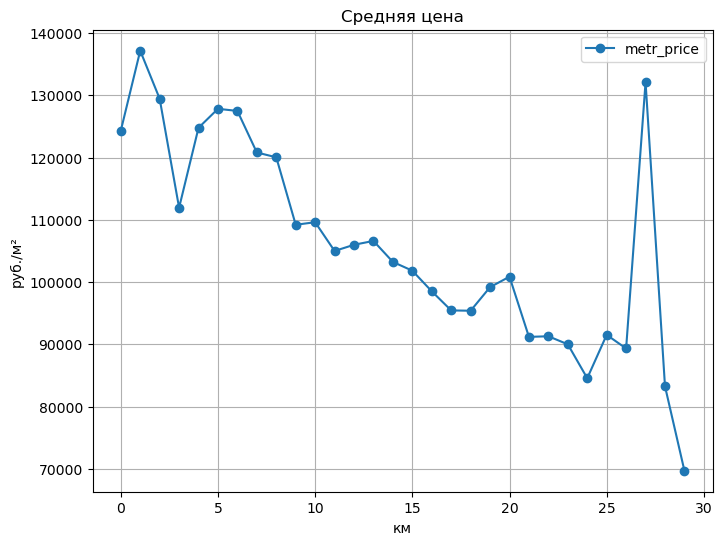

In [83]:
data_spb.pivot_table(index='city_centers_km', values='metr_price').plot(style='o-', grid=True, figsize=(8, 6))
plt.title('Средняя цена')
plt.xlabel('км')
plt.ylabel('руб./м²')
plt.show()

Судя по пиковой стоимости за квадратный метр - самая дорогая недвижимость находится в радиусе 5 км от географического центра. Значения стоимости, отраженные на "нулевом" км - думаю, это не объекты в самом сердце города, а те объекты, при заполнении которых значение о расстоянии было присвоено как "0" вместо отсутствующего(NaN).  
В целом, присутствует прямая зависимость цены от расстояния до центра города, что вполне логично. Чем дальше объект недвижимости находится от центра, тем ниже его стоимость. Небольшой скачок в последнем исследуемом радиусе (25-30 км) возникает, скорее всего, из-за наличия значительного количество предложений в каком-то новом элитном микрорайоне.


### 8. Итог

По итогу проведенного анализа данных о рынке недвижимости в СПб и окрестностях можно сделать следующие выводы:  
1. Львиную долю предложений о продаже  составляют 1-2-3х комнатные квартиры.  
2. Предложения на первом и последнем этажах имеют меньший успех продаж, нежели средняя этажность. Как следствие, цена квартир схожей планировки и площади на первои и последнем этажах зачастую существенно ниже, чем за такую же квартиру, но в середине этажности дома.  
3. Основное влияние на стоимость за квадратный метр и объекта в целом оказывают 2 основных фактора: общая площадь и расстояние до центра города. При анализе этих показателей наблюдается очень сильная корреляция, коэффициент стремится к 1.  
4. В 2015-2016 годах стоимость недвижимости не имела тенденции к изменению, с приходом 2017 года произошло резкое падение стоимости. Но, к концу года произошел стремительный рост, который продолжался до 2019 года. Скорее всего, это обусловлено возросшим спросом на жилье.  Спросу способствовали реализация программ по поддержке в приобретении жилья, появление льготной ипотеки для ряда категорий заемщиков (молодым семьям, молодым специалистам некоторых проф.областей, многодетным семьям).  
5. Разброс ценового диапазона в представленной выборке достаточно широкий. Самый дорогой объект продавался за 763 млн руб., при этом, самая дешевая квартира продана за 12 тыс. Мало похоже на правду. Стоимость никак не соответсвует реальному рынку. Даже кладовка стоит дороже. Скорее всего, на сайте была отражена рандомная цифра в качестве стоимости, и при снятии объявления с сайта, эта цифра попала в выборку.  
6. Если проводить анализ не по объектам в целом, а по стоимости 1 кв м, то нужно отметить следующее. Средняя рыночная стоимость составляет 100 432 руб, при этом медианное значение незначительно отличается и установилось на уровне 98 000 руб, что позволяет сделать вывод о их несущественном влиянии на анализ.  
    Средняя цена зафиксировалась на отметке 4,5-5 млн руб. По такой стоимости продано больше всего квартир. Значит, указанная цена является взвешенной рыночной стоимостью. Она смогла удовлетворить и спрос, и предложение на рынке.  
    Для большей наглядности при анализе использовались графики, из которых лего можно сделать вывод о том, что лидером по размещению объявлений о продаже недвижимости является "Санкт-Петербург", несмотря на это средняя цена квадратного метра приблизительно такая же как и по области.